# Quick exploration
This notebook is optional and for sanity checks.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

DATE_COL = "calendar_date"
STEPS_COL = "steps"
USERS_COL = "sdv_user_id"

#Load Data
df = pd.read_csv(r"C:\INHOLLAND UNIVERSITY\Internship Third Year\Project\DataProject\steps.csv")


df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors = "coerce") #convert time to correct format. and bad value to Nan
df[STEPS_COL] = pd.to_numeric(df[STEPS_COL], errors = "coerce") #convert number to correct format. and bad value to Nan


#Remove these Nan COLUMN
df = df.dropna(subset=[DATE_COL, STEPS_COL, USERS_COL])
print(f"Unique user: {sorted(df[USERS_COL].unique())}")





Unique user: [3724, 3859]


In [ ]:
def make_daily_for_user(df, user_id, DATE_COL, STEPS_COL, USER_COL):
    
    user_data = df[df[USER_COL] == user_id].copy()

    daily = (
        user_data
        .groupby(user_data[DATE_COL].dt.date)[STEPS_COL]
        .sum()
        .reset_index()
    )

    daily = daily.rename(columns={DATE_COL: "date", STEPS_COL: "steps"})

    daily["date"] = pd.to_datetime(daily["date"])

    iso = daily["date"].dt.isocalendar()

    daily["weekday_num"] = daily["date"].dt.weekday        
    daily["weekday"]     = daily["date"].dt.day_name()      
    daily["year_month"]  = daily["date"].dt.to_period("M").astype(str) 
    daily["year_week"]   = (
        iso.year.astype(str) + "-W" + iso.week.astype(str).str.zfill(2)
    ) 

    # Step 6: Return the final daily summary
    return daily



In [15]:
USER_ID = 3724  # 👈 change to 3859 to switch
daily = make_daily_for_user(df, USER_ID, DATE_COL, STEPS_COL, USERS_COL)
daily.head()


,date,steps,weekday_num,weekday,year_month,year_week
0,2025-06-01,6257.0,6,Sunday,2025-06,2025-W22
1,2025-06-02,5965.0,0,Monday,2025-06,2025-W23
2,2025-06-03,13424.0,1,Tuesday,2025-06,2025-W23
3,2025-06-04,4155.0,2,Wednesday,2025-06,2025-W23
4,2025-06-05,8357.0,3,Thursday,2025-06,2025-W23


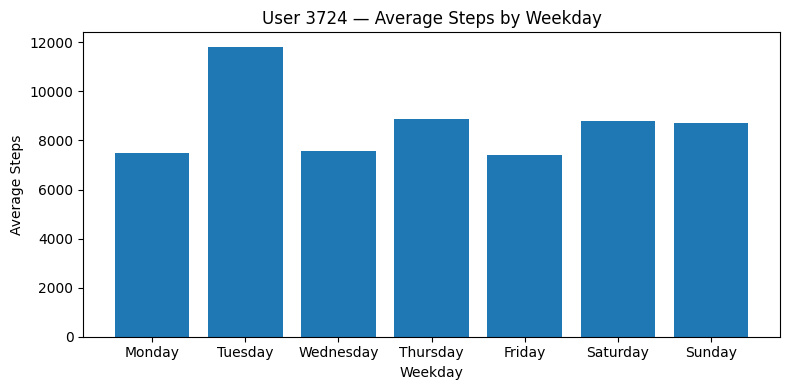

In [16]:
by_weekday = (daily.groupby(["weekday_num","weekday"])["steps"]
                   .mean()
                   .reset_index()
                   .sort_values("weekday_num"))

plt.figure(figsize=(8,4))
plt.bar(by_weekday["weekday"], by_weekday["steps"])
plt.title(f"User {USER_ID} — Average Steps by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Steps")
plt.tight_layout()
plt.show()


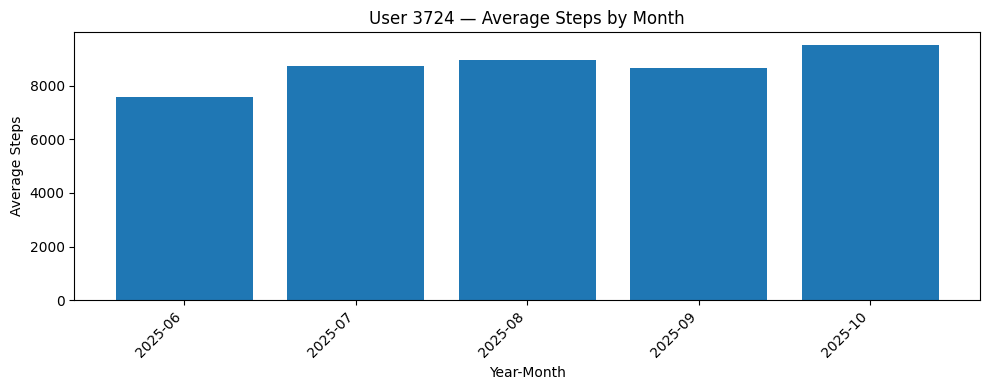

In [17]:
by_month = (daily.groupby("year_month")["steps"]
                 .mean()
                 .reset_index())

plt.figure(figsize=(10,4))
plt.bar(by_month["year_month"], by_month["steps"])
plt.title(f"User {USER_ID} — Average Steps by Month")
plt.xlabel("Year-Month")
plt.ylabel("Average Steps")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


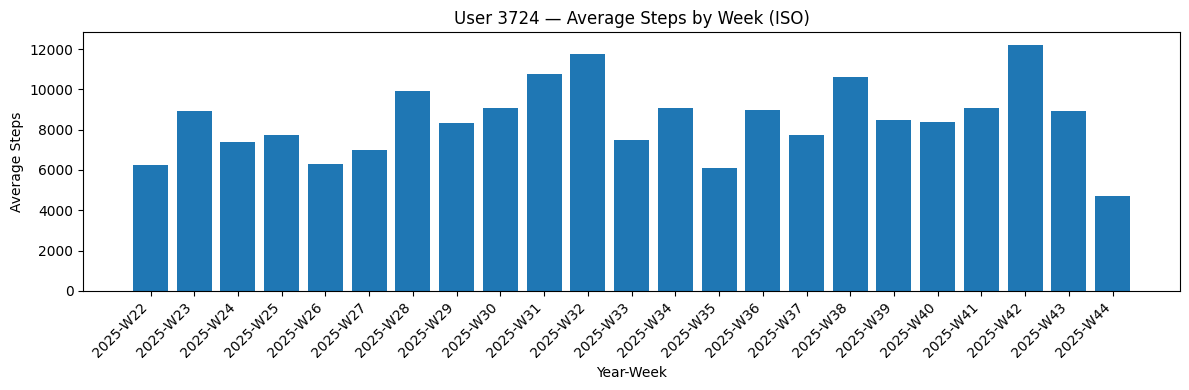

In [18]:
by_week = (daily.groupby("year_week")["steps"]
                .mean()
                .reset_index())

plt.figure(figsize=(12,4))
plt.bar(by_week["year_week"], by_week["steps"])
plt.title(f"User {USER_ID} — Average Steps by Week (ISO)")
plt.xlabel("Year-Week")
plt.ylabel("Average Steps")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


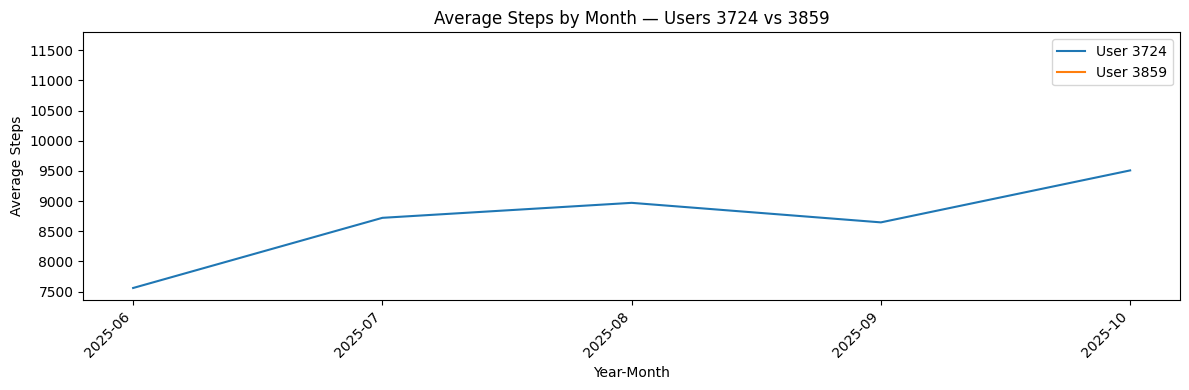

In [21]:
users = sorted(df[USERS_COL].unique())
monthly_list = []

for uid in users:
    d = make_daily_for_user(df, uid, DATE_COL, STEPS_COL, USERS_COL)
    m = d.groupby("year_month")["steps"].mean().reset_index()
    m["user"] = uid
    monthly_list.append(m)

monthly_all = pd.concat(monthly_list, ignore_index=True)
pivot = monthly_all.pivot(index="year_month", columns="user", values="steps").sort_index()

plt.figure(figsize=(12,4))
for uid in pivot.columns:
    plt.plot(pivot.index, pivot[uid], label=f"User {uid}")
plt.title("Average Steps by Month — Users 3724 vs 3859")
plt.xlabel("Year-Month")
plt.ylabel("Average Steps")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()
